In [1]:
import time
import os
import sys

from pathlib import Path

import numpy as np
import matplotlib
matplotlib.use('nbagg')
#from matplotlib import style
#style.use('ggplot')
import matplotlib.pyplot as plt

from astroscrappy import detect_cosmics
import photutils 

from scipy.ndimage import median_filter

import astropy.units as u
from astropy import stats
from astropy.io import fits

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
p = Path(".")

<IPython.core.display.Javascript object>


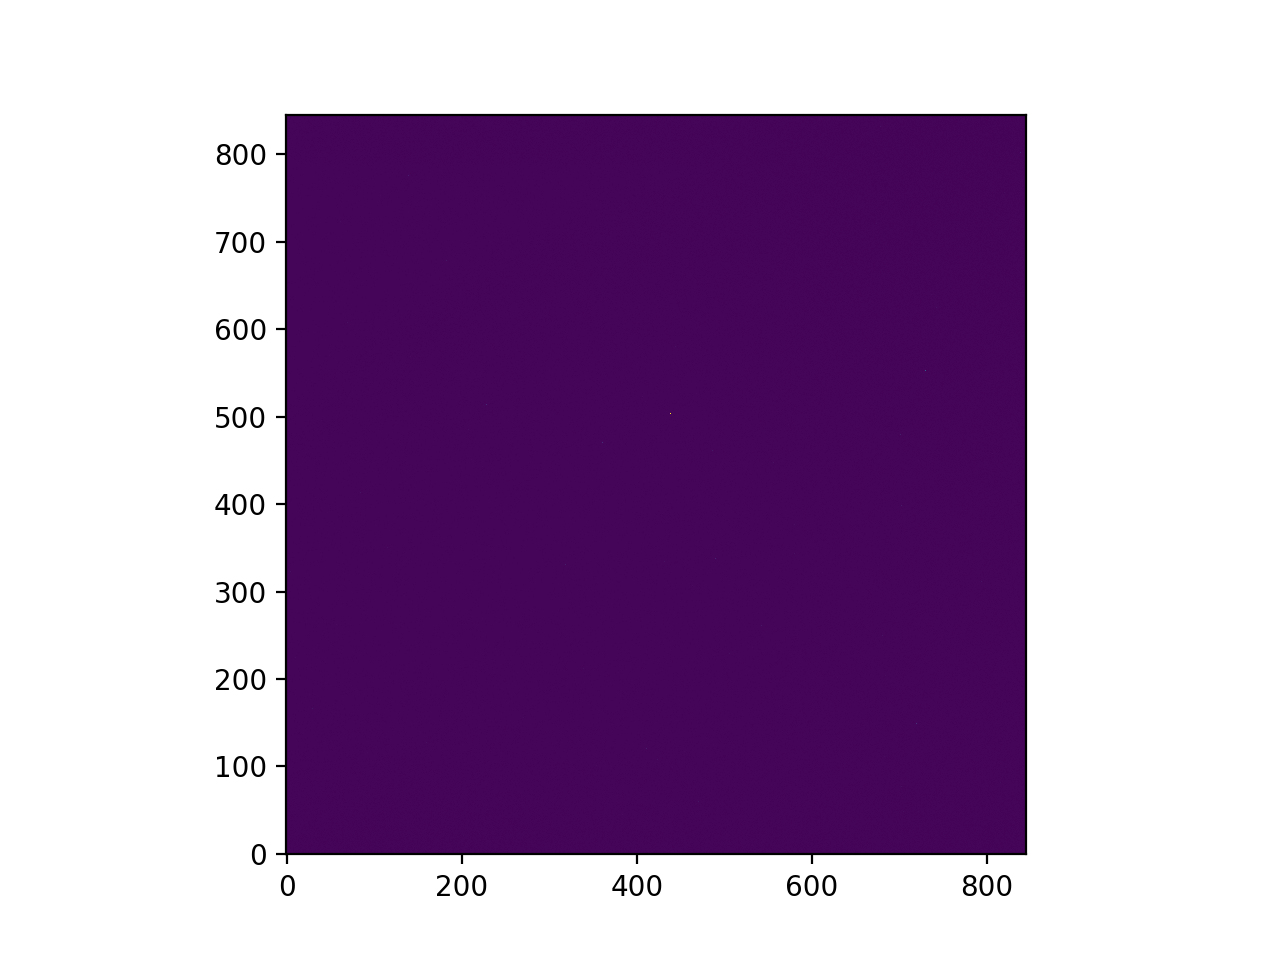

In [31]:
im = fits.open("f9_bad_pixel.fits")[0].data
im -= np.median(im)
plt.imshow(im, origin="lower")
plt.show()

<IPython.core.display.Javascript object>


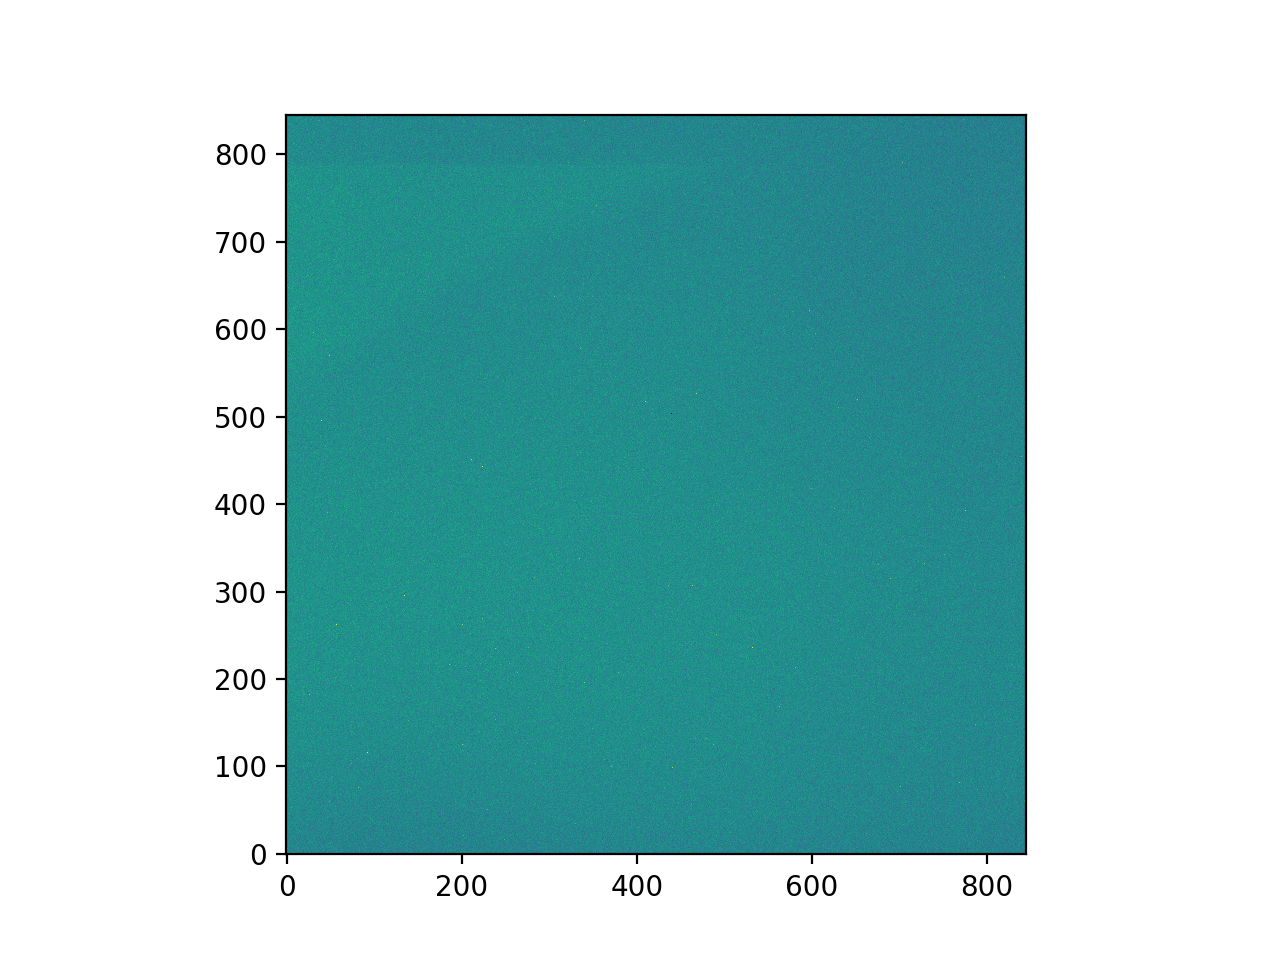

In [44]:
cr_mask, data = detect_cosmics(im, gain=2, readnoise=9.3, sigclip=100, cleantype='medmask')
plt.imshow(data, origin="lower")
plt.show()

<IPython.core.display.Javascript object>


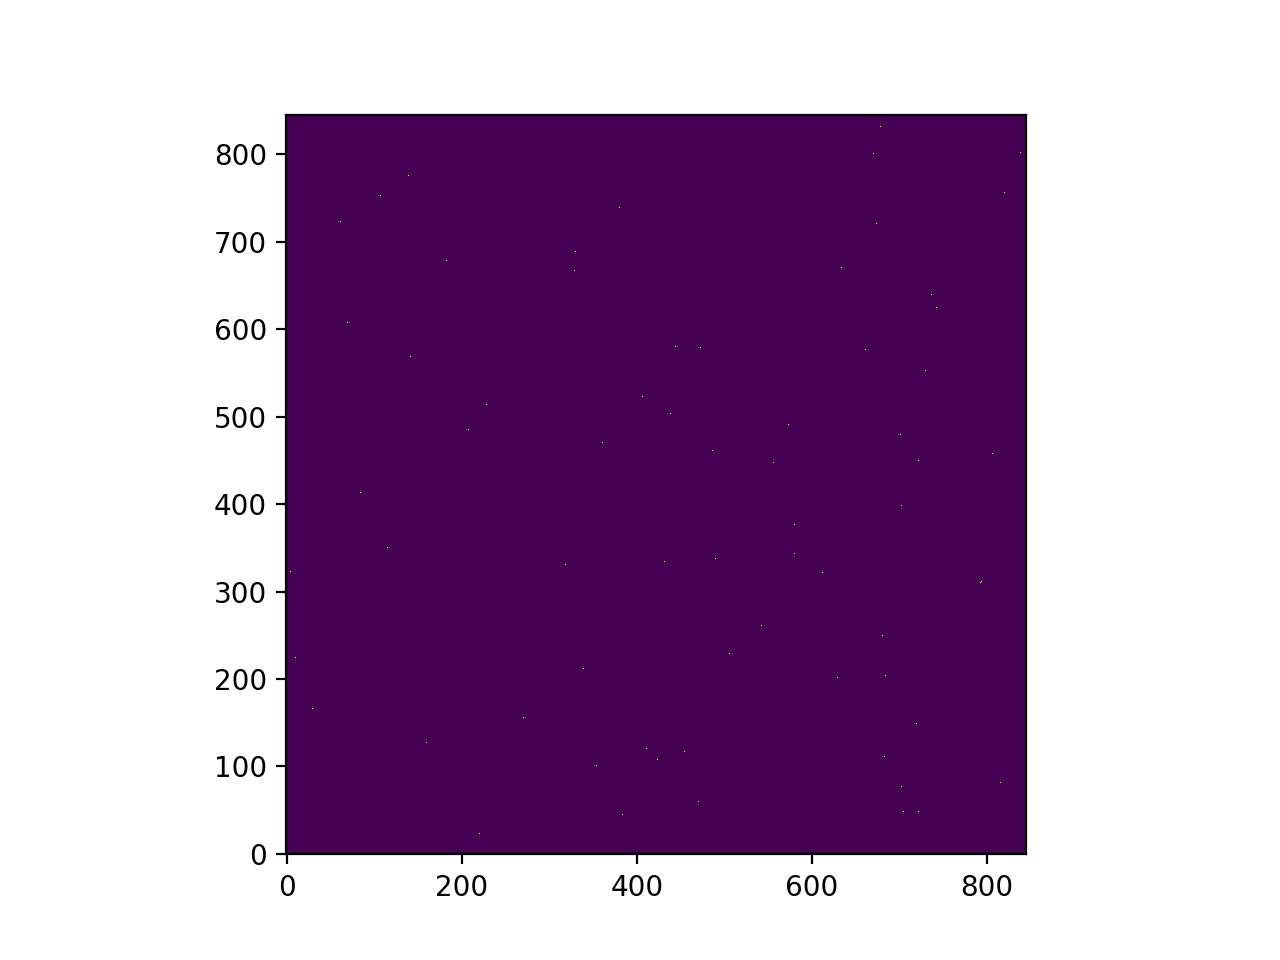

In [45]:
plt.imshow(cr_mask, origin="lower")
plt.show()

In [46]:
cr_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

<IPython.core.display.Javascript object>


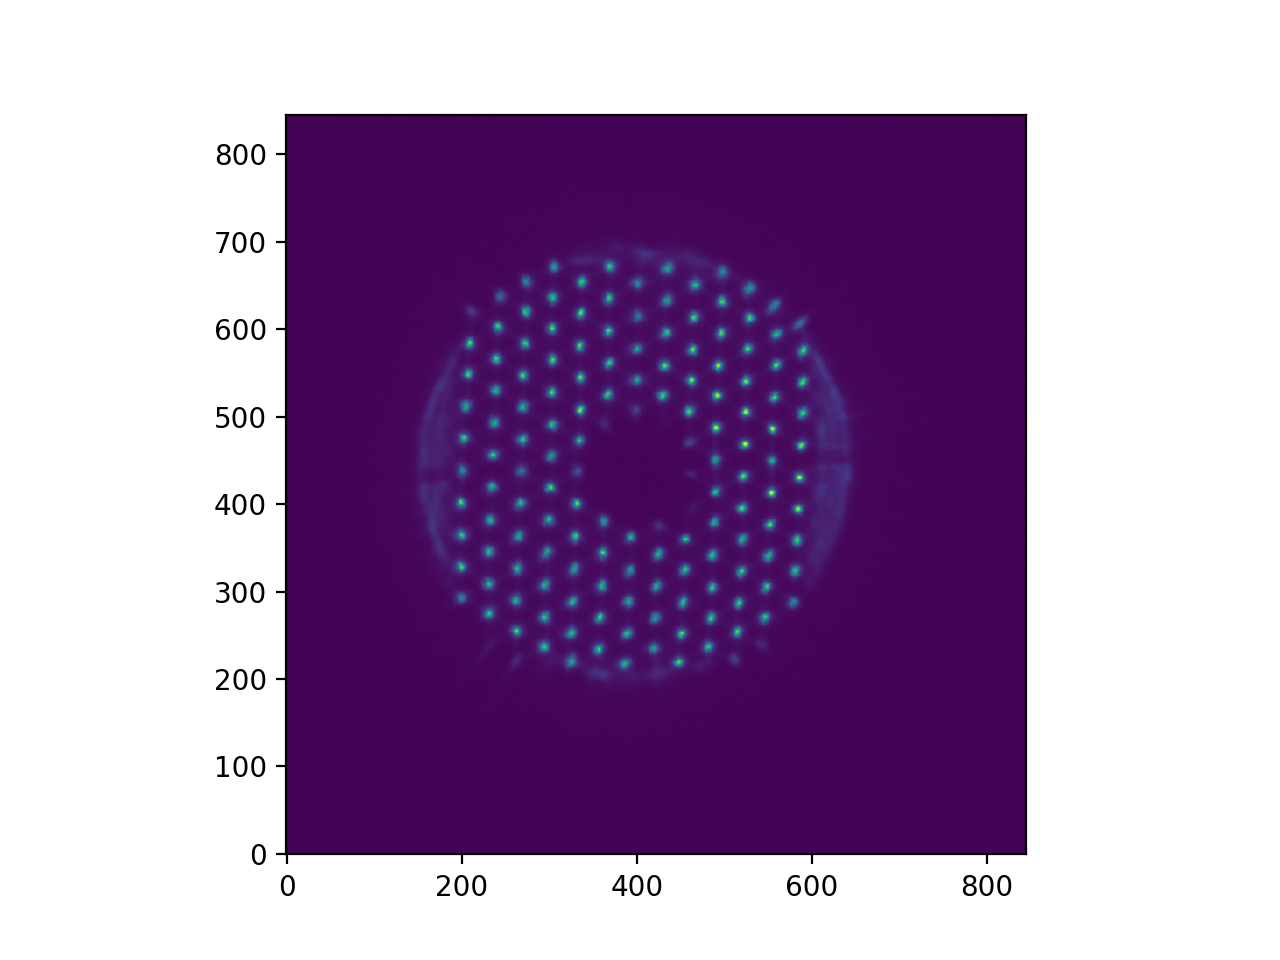

In [54]:
test_im = fits.open("/Users/tim/MMT/wfsdat/20171231/f9wfs_20171230-182343.fits")[-1].data
#test_im = fits.open("f9_bad_pixel.fits")[-1].data
blurred = median_filter(test_im, size=5)
test_im[cr_mask] = blurred[cr_mask]
plt.imshow(test_im, origin="lower")
plt.show()

In [50]:
fits.writeto("f9_mask.fits", cr_mask.astype(int))

In [61]:
m = fits.open("mask.fits")[-1].data.astype(bool)

In [62]:
m

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [29]:
detect_cosmics?

In [55]:
cr_mask.sum()

83